In [2]:
from google.colab import drive
drive. mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small.zip","r") as dataset_zip:
    dataset_zip.extractall("/content")

In [5]:
import os
data_root = "/content/cats_vs_dogs_small"
print( "Contents of the base directory:", os.listdir(data_root))

Contents of the base directory: ['test', 'validation', 'train']


In [7]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, applications

# Establishing the dataset_results function's proper path
training_path = '/content/cats_vs_dogs_small/train'
validation_path = '/content/cats_vs_dogs_small/validation'
testing_path = '/content/cats_vs_dogs_small/test'

In [8]:
# Loading the required datasets
ds_train = keras.preprocessing.image_dataset_from_directory(
    training_path,
    image_size=(180, 180),
    batch_size=32)

ds_val = keras.preprocessing.image_dataset_from_directory(
    validation_path,
    image_size=(180, 180),
    batch_size=32)

ds_test = keras.preprocessing.image_dataset_from_directory(
    testing_path,
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
# Displaying the sample images
def show_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, model_labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

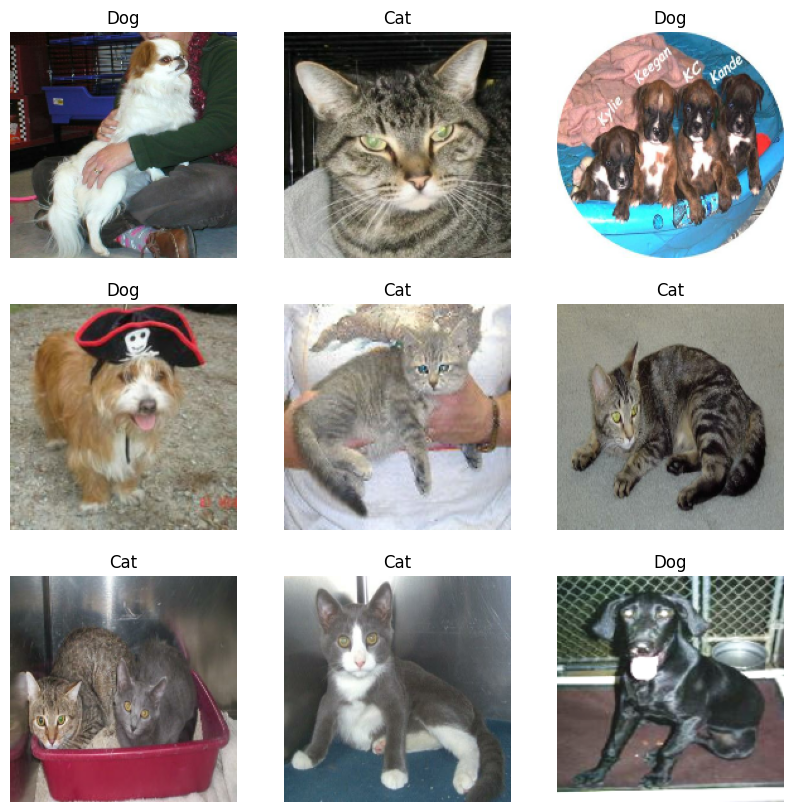

In [10]:
# Displaying the sample images
def show_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, model_labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title("Cat" if model_labels[i] == 0 else "Dog")
            plt.axis("off")
    plt.show()

# Call the function to display the images
show_images(ds_train)

In [11]:
# Function to create a CNN cnn_model from scratch
def build_custom_model():
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return cnn_model


In [12]:
# Data augmentation and the preprocessing with sample size parameter
def prepare_data_flows(training_path, validation_path, batch_size, num_samples=None):
    train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    gen_train = train_datagen.flow_from_directory(
        training_path,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )

    val_generator = val_datagen.flow_from_directory(
        validation_path,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )

    return gen_train, val_generator


In [15]:
# Training the cnn_model
def fit_model(cnn_model, gen_train, gen_val, num_epochs=30):
    training_log = cnn_model.fit(gen_train,
                        validation_data=gen_val,
                                epochs=num_epochs) # Changed 'num_epochs' to 'epochs'
    return training_log


In [16]:
# Step 1: Training the cnn_model from scratch with 1000 samples
train_generator_1, validation_generator_1 = prepare_data_flows(training_path, validation_path, batch_size=32, num_samples=1000)

model_A = build_custom_model()

history_A = fit_model(model_A, train_generator_1, validation_generator_1)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 382ms/step - accuracy: 0.5011 - loss: 1.0270 - val_accuracy: 0.5690 - val_loss: 0.6897
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 387ms/step - accuracy: 0.5660 - loss: 0.6886 - val_accuracy: 0.5850 - val_loss: 0.6806
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 383ms/step - accuracy: 0.5731 - loss: 0.6644 - val_accuracy: 0.6040 - val_loss: 0.6601
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 381ms/step - accuracy: 0.5835 - loss: 0.6674 - val_accuracy: 0.6420 - val_loss: 0.6328
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - accuracy: 0.6074 - loss: 0.6659 - val_accuracy: 0.5650 - val_loss: 0.7205
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 377ms/step - accuracy: 0.5596 - loss: 0.6888 - val_accuracy: 0.6040 - val_loss: 0.6609
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 380ms/step - accuracy: 0.5702 - loss: 0.6822 - val_accuracy: 0.5760 - val_loss: 0.6650
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 378ms/step - accuracy: 0.6231 - loss: 0.6651 - val_accu

In [17]:
# Step 2: Increasing the training samples from 1000 to 1500
train_generator_2, validation_generator_2 = prepare_data_flows(training_path, validation_path, batch_size=32, num_samples=1500)
model_B = build_custom_model()
history_B = fit_model(model_B, train_generator_2, validation_generator_2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 377ms/step - accuracy: 0.4971 - loss: 1.3384 - val_accuracy: 0.5490 - val_loss: 0.6928
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - accuracy: 0.5192 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 368ms/step - accuracy: 0.4954 - loss: 0.6981 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.5059 - loss: 0.6931 - val_accuracy: 0.5400 - val_loss: 0.6916
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 376ms/step - accuracy: 0.5491 - loss: 0.6970 - val_accuracy: 0.5000 - val_loss: 0.7021
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 373ms/step - accuracy: 0.5034 - loss: 0.6903 - val_accuracy: 0.5490 - val_loss: 0.6802
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 377ms/step - accuracy: 0.5339 - loss: 0.6839 - val_accuracy: 0.5240 - val_loss: 0.6858
Epoch 8/30
63

In [18]:
# Step 3: Now,using the total 2000 samples
train_generator_3, validation_generator_3 = prepare_data_flows(training_path, validation_path, batch_size=32, num_samples=2000)
model_C = build_custom_model()
history_C = fit_model(model_C, train_generator_3, validation_generator_3)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 380ms/step - accuracy: 0.5096 - loss: 0.9308 - val_accuracy: 0.4900 - val_loss: 0.6930
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 374ms/step - accuracy: 0.5026 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 369ms/step - accuracy: 0.4992 - loss: 0.6934 - val_accuracy: 0.5470 - val_loss: 0.6921
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.5338 - loss: 0.6974 - val_accuracy: 0.5800 - val_loss: 0.6807
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.5489 - loss: 0.6953 - val_accuracy: 0.5730 - val_loss: 0.6760
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 369ms/step - accuracy: 0.5688 - loss: 0.6809 - val_accuracy: 0.6330 - val_loss: 0.6461
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 377ms/step - accuracy: 0.6079 - loss: 0.6666 - val_accuracy: 0.5700 - val_loss: 0.6530
Epoch 8/30
63

In [19]:
# Step 4: Now use a pretrained cnn_model (e.g., VGG16)
def build_pretrained_model():
    base_model = applications.VGG16(include_top=False, weights='imagenet', input_shape=(180, 180, 3))
    base_model.trainable = False  # Freeze the base cnn_model

    cnn_model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return cnn_model

In [20]:
# Repeating the Steps 1 to 3 with the pretrained cnn_model
model_P1 = build_pretrained_model()
history_P1 = fit_model(model_P1, train_generator_1, validation_generator_1)

model_P2 = build_pretrained_model()
history_P2 = fit_model(model_P2, train_generator_2, validation_generator_2)

model_P3 = build_pretrained_model()
history_P3 = fit_model(model_P3, train_generator_3, validation_generator_3)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 666ms/step - accuracy: 0.6499 - loss: 1.3855 - val_accuracy: 0.8680 - val_loss: 0.3160
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 656ms/step - accuracy: 0.8329 - loss: 0.3674 - val_accuracy: 0.8950 - val_loss: 0.2389
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 652ms/step - accuracy: 0.8352 - loss: 0.3720 - val_accuracy: 0.9040 - val_loss: 0.2244
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 650ms/step - accuracy: 0.8678 - loss: 0.2976 - val_accuracy: 0.8240 - val_loss: 0.4290
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 661ms/step - accuracy: 0.8318 - loss: 0.3490 - val_accuracy: 0.8970 - val_loss: 0.2562
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 656ms/step - accuracy: 0.8590 - loss: 0.3156 - val_accuracy: 0.8870 - val_loss: 0.2724
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 662ms/step - accuracy: 0.8495 - loss: 0.3382 - val_accuracy: 0.9140 - val_loss: 0.2175
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 656m

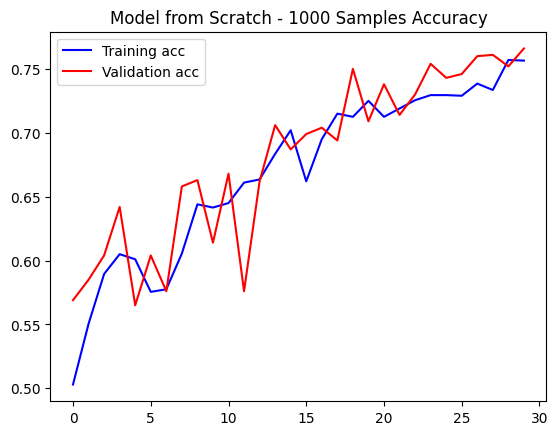

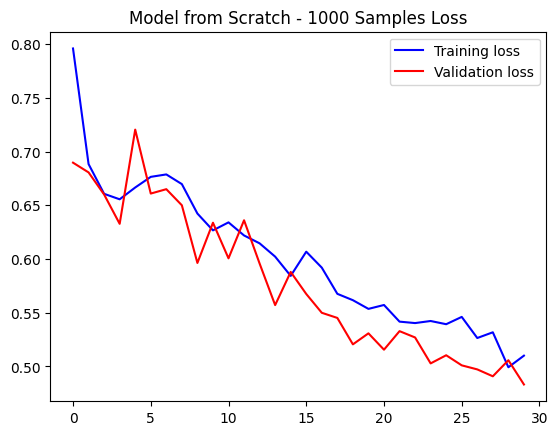

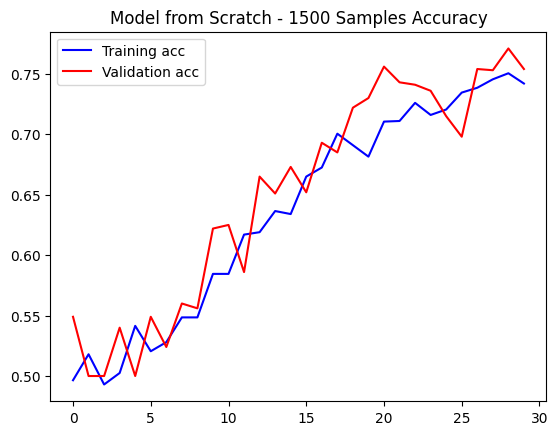

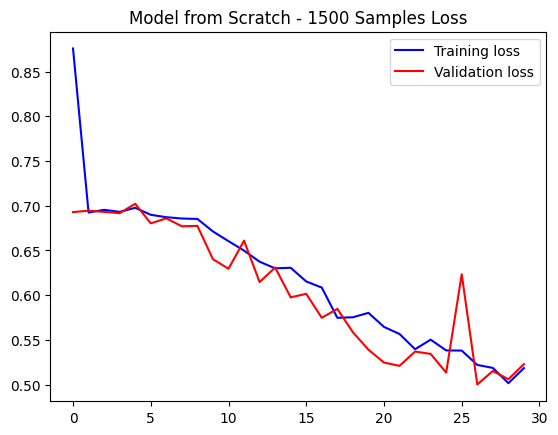

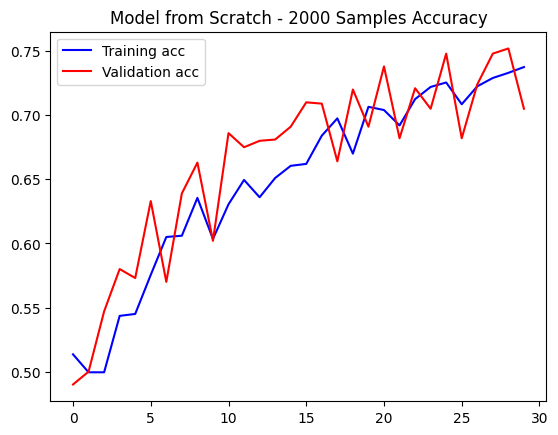

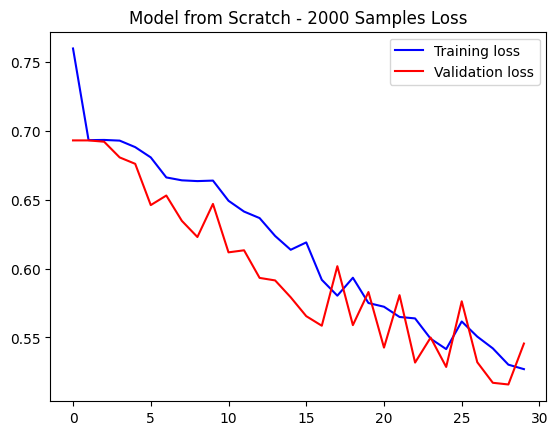

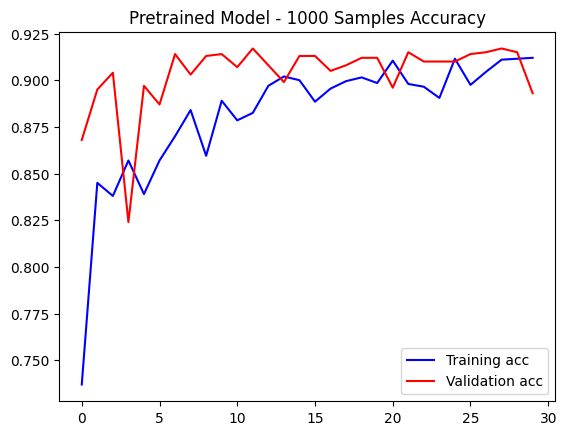

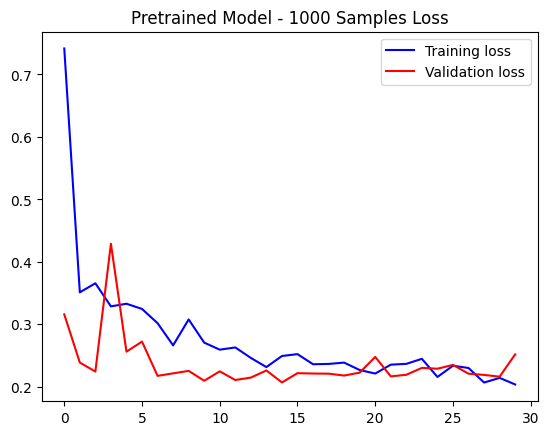

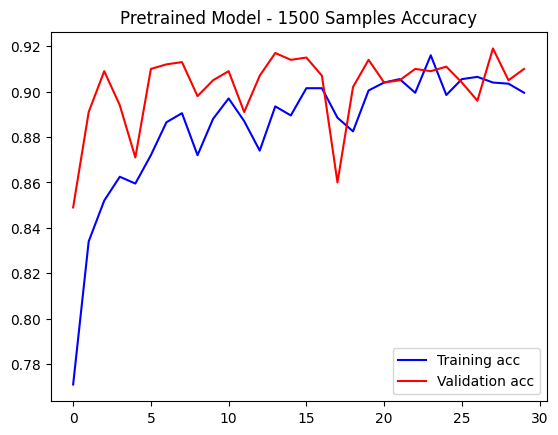

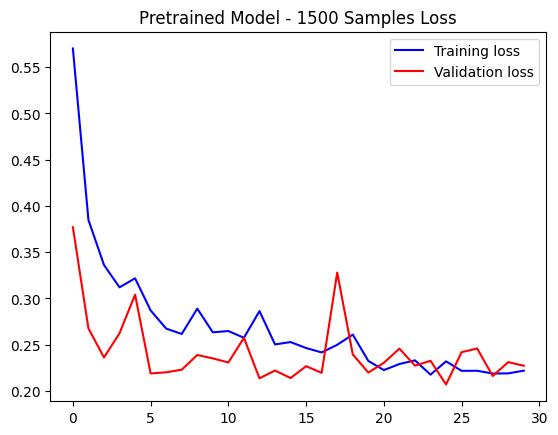

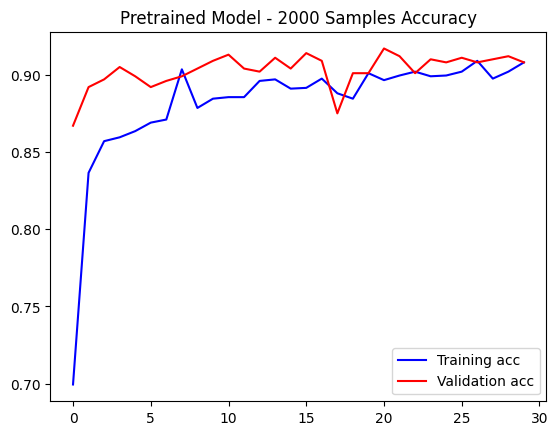

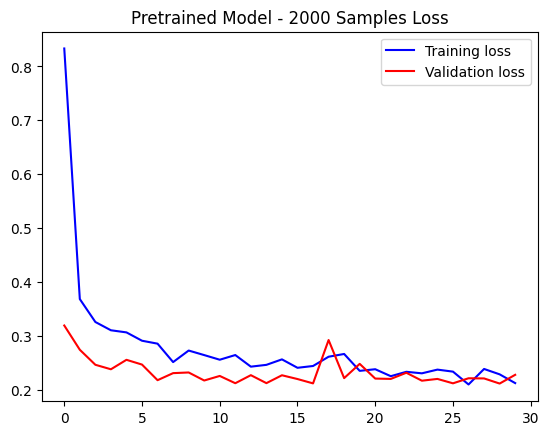

In [28]:
# Performance visualization function
def visualize_performance(training_log, title):
    acc = training_log.history['accuracy'] # Changed from training_log.training_log['accuracy'] to training_log.history['accuracy']
    val_acc = training_log.history['val_accuracy'] # Changed from training_log.training_log['val_accuracy'] to training_log.history['val_accuracy']
    loss = training_log.history['loss'] # Changed from training_log.training_log['loss'] to training_log.history['loss']
    val_loss = training_log.history['val_loss'] # Changed from training_log.training_log['val_loss'] to training_log.history['val_loss']

    num_epochs = range(len(acc))

    plt.figure()
    plt.plot(num_epochs, acc, 'b', label='Training acc')
    plt.plot(num_epochs, val_acc, 'r', label='Validation acc')
    plt.title(title + ' Accuracy')
    plt.legend()

    plt.figure()
    plt.plot(num_epochs, loss, 'b', label='Training loss')
    plt.plot(num_epochs, val_loss, 'r', label='Validation loss')
    plt.title(title + ' Loss')
    plt.legend()
    plt.show()

# Plot for the performance of each cnn_model
visualize_performance(history_A, 'Model from Scratch - 1000 Samples')
visualize_performance(history_B, 'Model from Scratch - 1500 Samples')
visualize_performance(history_C, 'Model from Scratch - 2000 Samples')
visualize_performance(history_P1, 'Pretrained Model - 1000 Samples')
visualize_performance(history_P2, 'Pretrained Model - 1500 Samples')
visualize_performance(history_P3, 'Pretrained Model - 2000 Samples')

In [33]:
def aggregate_results(all_histories, model_labels):
    summary = {}

    for i, training_log in enumerate(all_histories):
        # Access history using the 'history' attribute directly
        final_train_acc = training_log.history['accuracy'][-1]
        final_val_acc = training_log.history['val_accuracy'][-1]
        final_train_loss = training_log.history['loss'][-1]
        final_val_loss = training_log.history['val_loss'][-1]

        summary[model_labels[i]] = {
            'Final Training Accuracy': final_train_acc,
            'Final Validation Accuracy': final_val_acc,
            'Final Training Loss': final_train_loss,
            'Final Validation Loss': final_val_loss,
        }

    return summary

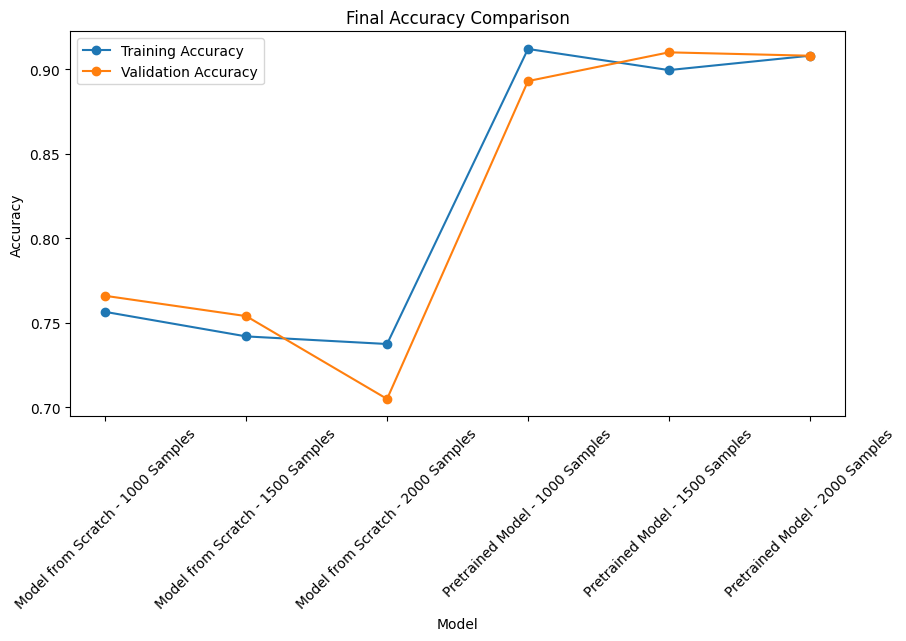

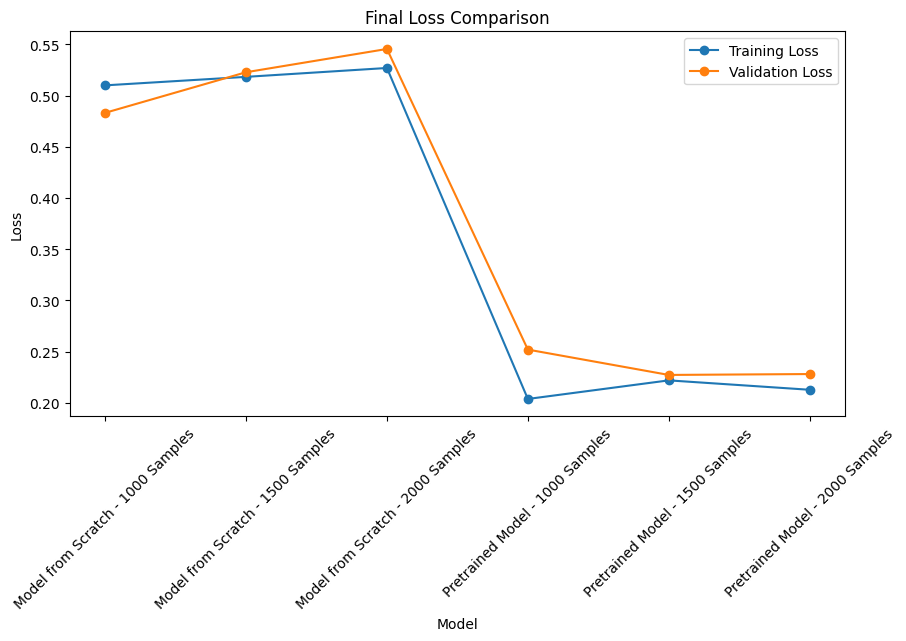

In [34]:
# Function for comparing cnn_model's performances visually
def compare_models(final_scores):
    model_labels = list(final_scores.keys())
    train_acc = [final_scores[label]['Final Training Accuracy'] for label in model_labels]
    val_acc = [final_scores[label]['Final Validation Accuracy'] for label in model_labels]
    train_loss = [final_scores[label]['Final Training Loss'] for label in model_labels]
    val_loss = [final_scores[label]['Final Validation Loss'] for label in model_labels]

    # Plot for comparing Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(model_labels, train_acc, label='Training Accuracy', marker='o')
    plt.plot(model_labels, val_acc, label='Validation Accuracy', marker='o')
    plt.xticks(rotation=45)
    plt.title('Final Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Comparison plot for loss
    plt.figure(figsize=(10, 5))
    plt.plot(model_labels, train_loss, label='Training Loss', marker='o')
    plt.plot(model_labels, val_loss, label='Validation Loss', marker='o') #This line was outside the function
    plt.xticks(rotation=45) # This line had incorrect indentation
    plt.title('Final Loss Comparison')
    plt.xlabel('Model')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Summary of final values
final_scores = aggregate_results(all_histories, model_labels) # Call aggregate_results and assign the result to final_scores

# Plotting all the comparisons
compare_models(final_scores) # Now final_scores is defined